# 📈🥤🔮 Future Forecast For Coca Cola Stock Prices

## ℹ️📂📝 About the Dataset
This dataset provides historical stock price data for The Coca-Cola Company (NYSE: KO) from September 6, 1919, to January 31, 2025. Extracted from Yahoo Finance, this dataset is valuable for stock market analysis, long-term trend evaluation, and financial modeling.
This Dataset is taken from [Kaggle](https://www.kaggle.com/datasets/matiflatif/coca-cola-complete-stocks-dataweekly-updated/data)

## 📊🔢📑 Dataset Features

- `Date`: The trading date in YYYY-MM-DD format.

- `Open`: Opening price of Coca-Cola stock on the respective day.

- `High`: Highest price recorded during the trading session.

- `Low`: Lowest price recorded during the trading session.

- `Close`: Closing price of the stock at the end of the trading session.

- `Adj Close`: Adjusted closing price, accounting for stock splits and dividends.

- `Volume`: Total number of shares traded on that day.

- `Total Records`: 15,877 rows.
- `Number of Features`: 7 columns.
- `Time Span`: Over 100 years of stock data (1919-2025)

## Data Source:
This dataset has been extracted from `Yahoo Finance`.



## 📚⚙️ Importing the Libraries

In [59]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Importing the datasets
Import the datasets and combine these datasets into 1 complete dataset.

#### Define the File paths

In [60]:
csv_files = [
    "C:\\Users\\HP\\Documents\\Projects\\Coca_Cola\\KO_1919-09-06_2025-01-31.csv",
    "C:\\Users\\HP\\Documents\\Projects\\Coca_Cola\\KO_1919-09-06_2025-02-18.csv",
    "C:\\Users\\HP\\Documents\\Projects\\Coca_Cola\\KO_1919-09-06_2025-02-24.csv",
    "C:\\Users\\HP\\Documents\\Projects\\Coca_Cola\\KO_1919-09-06_2025-03-02.csv",
    "C:\\Users\\HP\\Documents\\Projects\\Coca_Cola\\KO_1919-09-06_2025-02-07.csv"
]


#### Combine and preprocess all the CSVs 

In [61]:
dfs = []
for file in csv_files:
    df = pd.read_csv(file)

    # Standardize column names (all lowercase, strip spaces)
    df.columns = df.columns.str.lower().str.strip()

    # Convert date column to a uniform format (YYYY-MM-DD)
    if "date" in df.columns:
        df["date"] = pd.to_datetime(df["date"], errors='coerce', utc=True).dt.tz_localize(None)

    dfs.append(df)

#### Merge all the Datasets

In [62]:
df_merged = pd.concat(dfs, ignore_index=True)
df_merged.head()

,date,open,high,low,close,adj close,volume,adj_close
0,1962-01-02,0.263021,0.270182,0.263021,0.263021,0.046381,806400,NaN
1,1962-01-03,0.259115,0.259115,0.253255,0.257161,0.045348,1574400,NaN
2,1962-01-04,0.257813,0.261068,0.257813,0.259115,0.045692,844800,NaN
3,1962-01-05,0.259115,0.262370,0.252604,0.253255,0.044659,1420800,NaN
4,1962-01-08,0.251302,0.251302,0.245768,0.250651,0.044200,2035200,NaN


##### Now there duplicate columns like `adj_close`. Fix/duplicate the columns

In [63]:
if "adj close" in df_merged.columns and "adj_close" in df_merged.columns:
    # Keep the column with the most non-null values
    df_merged["adj_close"] = df_merged["adj close"].combine_first(df_merged["adj_close"])
    df_merged = df_merged.drop(columns=["adj close"])  # Remove the duplicate column

##### Remove the duplicate rows

In [64]:
df_merged = df_merged.drop_duplicates()

In [65]:
df_merged.to_csv("Coca_cola_stock_price.csv")

In [66]:
# Check the information of the dataset
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72416 entries, 0 to 79334
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       72416 non-null  datetime64[ns]
 1   open       72416 non-null  float64       
 2   high       72416 non-null  float64       
 3   low        72416 non-null  float64       
 4   close      72416 non-null  float64       
 5   volume     72416 non-null  int64         
 6   adj_close  72416 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 4.4 MB


#### Check for any missing values

In [67]:
df_merged.isnull().sum()

date         0
open         0
high         0
low          0
close        0
volume       0
adj_close    0
dtype: int64

#### Since there are no missing values, Proceeding to Data Visualizations

## 📊📉📈 Data Visualizations

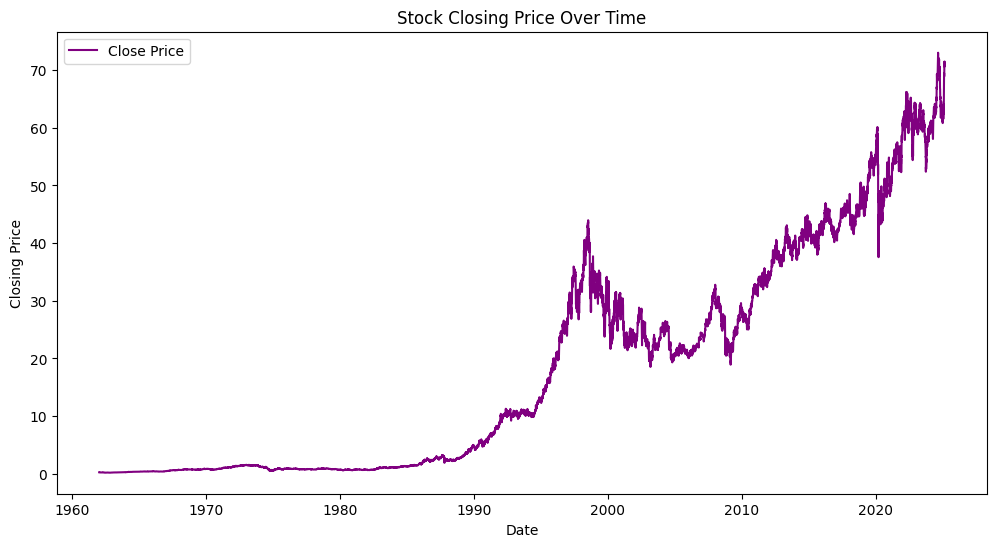

In [68]:
# Ensure 'date' is in datetime format
merged_df["date"] = pd.to_datetime(merged_df["date"], errors="coerce")

# Sort the dataset by date to avoid incorrect plotting
merged_df = merged_df.sort_values(by="date")

# Drop duplicate date entries if they exist
merged_df = merged_df.drop_duplicates(subset=["date"])

# Re-plot the data
plt.figure(figsize=(12, 6))
plt.plot(merged_df["date"], merged_df["close"], label="Close Price", color="purple")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Stock Closing Price Over Time")
plt.legend()
plt.show()

#### Distribution of Closing prices

Text(0, 0.5, 'Frequency')

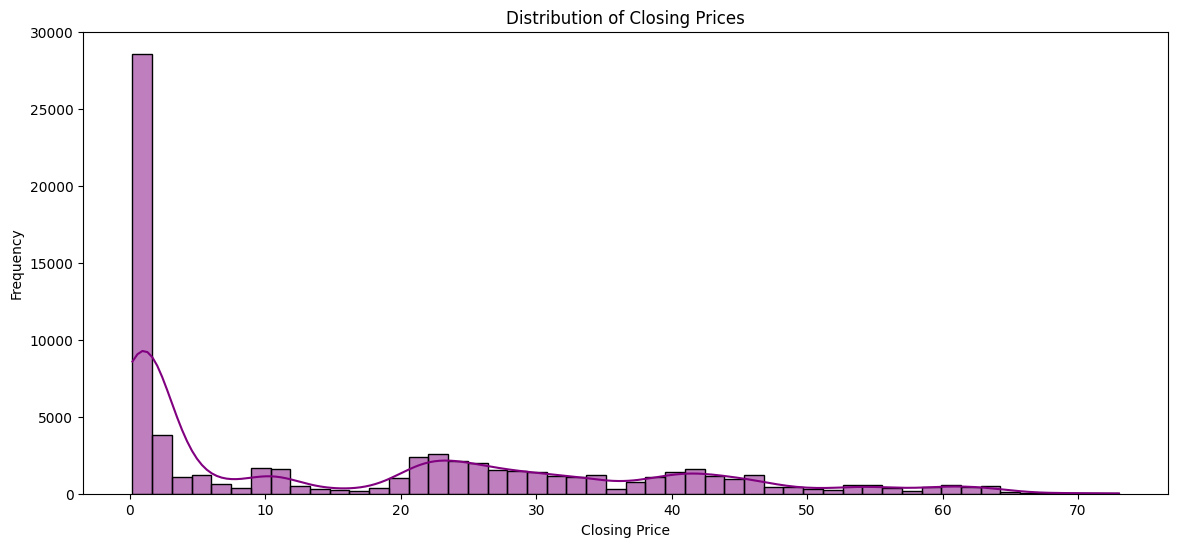

In [69]:
plt.figure(figsize=(14, 6))
sns.histplot(df_merged['close'], bins=50, kde=True, color="purple")
plt.title("Distribution of Closing Prices")
plt.xlabel("Closing Price")
plt.ylabel("Frequency")

#### Boxplot for distribution of stock prices

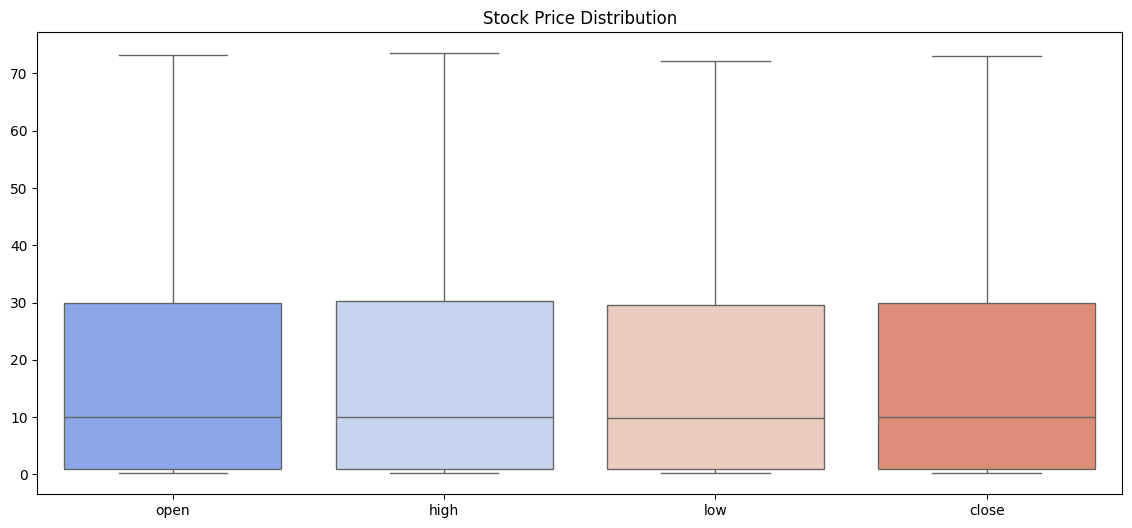

In [70]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_merged[['open', 'high', 'low', 'close']], palette="coolwarm")
plt.title("Stock Price Distribution")
plt.show()

##### Before moving to Machine Learning prediction, Convert Date back to Unix timestamp 

In [71]:
df_merged["date"] = pd.to_datetime(df_merged["date"]).astype("int64") // 10**9  # Convert datetime to Unix timestamp

In [72]:
df_merged.head()

,date,open,high,low,close,volume,adj_close
0,-252374400,0.263021,0.270182,0.263021,0.263021,806400,0.046381
1,-252288000,0.259115,0.259115,0.253255,0.257161,1574400,0.045348
2,-252201600,0.257813,0.261068,0.257813,0.259115,844800,0.045692
3,-252115200,0.259115,0.262370,0.252604,0.253255,1420800,0.044659
4,-251856000,0.251302,0.251302,0.245768,0.250651,2035200,0.044200


## ✂️📊🔀 Dataset Splitting

In [73]:
X = df_merged[["date", "open", "high", "low", "volume"]]
y = df_merged["close"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=537)

## 🤖📚🔮 Model Training & Predictions

In [74]:
model = RandomForestRegressor(n_estimators=100, random_state=537)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

## Model Evaluations

In [76]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
print("MAE:", mae, "MSE:", mse)

MAE: 0.008274171427375803 MSE: 0.0007824931114397963


## Visualize the Predictions

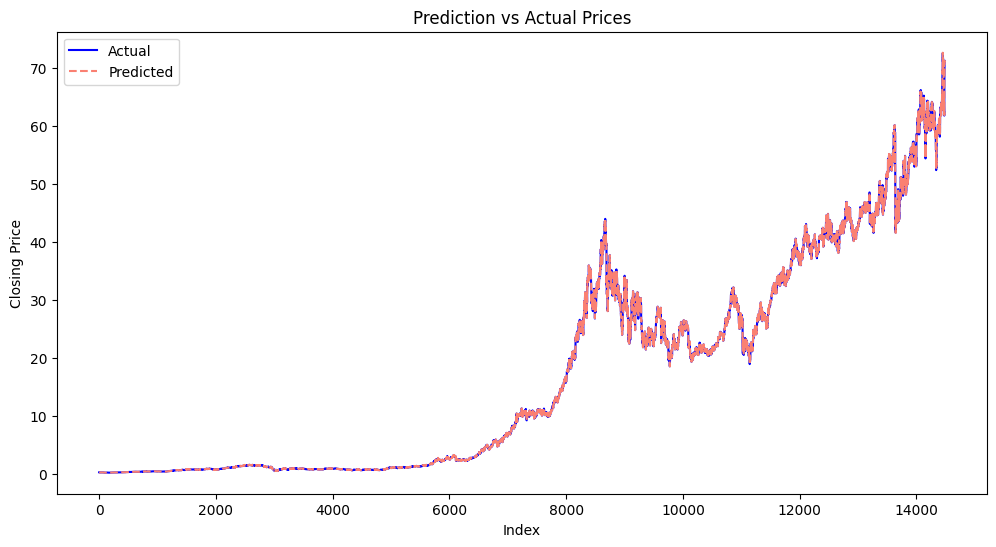

In [78]:
# Ensure test data is sorted correctly
X_test_sorted, y_test_sorted = zip(*sorted(zip(X_test["date"], y_test)))
y_pred_sorted = [pred for _, pred in sorted(zip(X_test["date"], predictions))]

# Prediction vs Actual Prices Plot
plt.figure(figsize=(12, 6))
plt.plot(y_test_sorted, label="Actual", color="blue")
plt.plot(y_pred_sorted, label="Predicted", color="salmon", linestyle="dashed")
plt.xlabel("Index")
plt.ylabel("Closing Price")
plt.title("Prediction vs Actual Prices")
plt.legend()
plt.show()

## 🔮🤖📈 Future Forecasting using Deep Learning (TensorFlow)

#### Dataset Splitting


In [79]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(merged_df[["close"]])

X_dl, y_dl = [], []
time_steps = 30 # create sequences of 30 days to use as input
for i in range(time_steps, len(scaled_data)):
    X_dl.append(scaled_data[i-time_steps:i, 0])
    y_dl.append(scaled_data[i, 0])

X_dl, y_dl = np.array(X_dl), np.array(y_dl)
X_dl = X_dl.reshape((X_dl.shape[0], X_dl.shape[1], 1))

X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(X_dl, y_dl, test_size=0.2, random_state=42)

## Deep Learning Model Training
##### Using `LSTM` model

In [80]:
dl_model = keras.Sequential([
    layers.LSTM(50, return_sequences=True, input_shape=(X_dl.shape[1], 1)),
    layers.LSTM(50, return_sequences=False),
    layers.Dense(25),
    layers.Dense(1)
])

dl_model.compile(optimizer="adam", loss="mse")
dl_model.fit(X_train_dl, y_train_dl, epochs=20, batch_size=16, validation_data=(X_test_dl, y_test_dl))


c:\Users\HP\Documents\Projects\Coca_Cola\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1588/1588 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - loss: 0.0020 - val_loss: 4.3012e-05
Epoch 2/20
1588/1588 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - loss: 7.4017e-05 - val_loss: 6.6401e-05
Epoch 3/20
1588/1588 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - loss: 4.9969e-05 - val_loss: 3.3136e-05
Epoch 4/20
1588/1588 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - loss: 4.0303e-05 - val_loss: 1.9392e-05
Epoch 5/20
1588/1588 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - loss: 3.0375e-05 - val_loss: 1.4873e-05
Epoch 6/20
1588/1588 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - loss: 2.7361e-05 - val_loss: 1.5826e-05
Epoch 7/20
1588/1588 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - loss: 2.6751e-05 - val_loss: 4.4714e-05
Epoch 8/20
1588/1588 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - loss: 2.3913e-05 - val_loss: 1.3490e-05
Epoch 9/20
1588/1588 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - loss: 2.0939e-05 - val_loss: 1.2031e-05
Epoch 10/20
1588/1588 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - loss: 1.9735e-05 - val_loss: 1.6834e-05
Epoch 11/20
1588/1588 ━

In [ ]:
# Predictions
predictions_dl = dl_model.predict(X_test_dl)
predictions_dl = scaler.inverse_transform(predictions_dl)

199/199 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


## Visualize the Forecasting made by Deep Learning

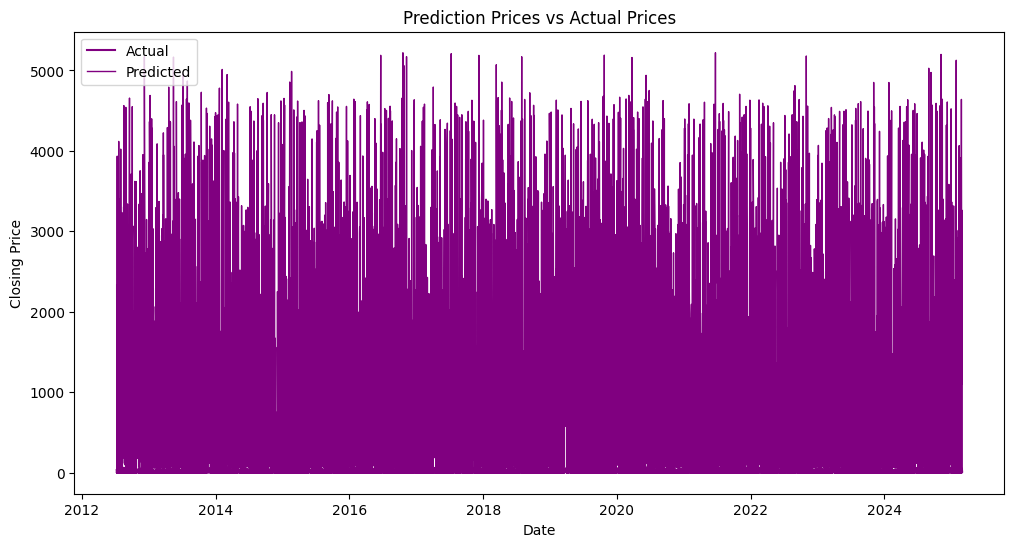

In [84]:
plt.figure(figsize=(12, 6))

# Convert Unix timestamps back to datetime for proper x-axis labels
actual_dates = pd.to_datetime(merged_df["date"][-len(y_test_dl):])

# actual prices
plt.plot(actual_dates, 
         scaler.inverse_transform(y_test_dl.reshape(-1, 1)), 
         color="purple")

# predicted prices
plt.plot(actual_dates, 
         scaler.inverse_transform(predictions_dl), 
         color="purple", linewidth=1)

plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Prediction Prices vs Actual Prices")
plt.legend(["Actual", "Predicted"], loc="upper left")

plt.show()

## Predict Future Prices using Deep Learning

In [ ]:
# Convert date column to datetime format and sort
df_merged["date"] = pd.to_datetime(df_merged["date"])
df_merged = df_merged.sort_values("date")

# Scale the closing price data
scaler = MinMaxScaler()
df_merged["scaled_close"] = scaler.fit_transform(df_merged[["close"]])  # Ensure 'scaled_close' exists

In [87]:
time_steps = 60  # Use last 60 days to predict the next value
X_train, y_train = [], []
for i in range(time_steps, len(df_merged) - 1):
    X_train.append(df_merged["scaled_close"].iloc[i-time_steps:i].values)
    y_train.append(df_merged["scaled_close"].iloc[i+1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

# Build the LSTM Model
model = keras.Sequential([
    keras.Input(shape=(X_train.shape[1], 1)),  # Explicit Input layer
    layers.LSTM(50, return_sequences=True),
    layers.LSTM(50, return_sequences=False),
    layers.Dense(25),
    layers.Dense(1)
])

model.compile(optimizer="adam", loss="mse")
model.fit(X_train, y_train, epochs=20, batch_size=64)

# Predict Future Stock Prices
future_days = 30  # Number of future days to predict
last_60_days = df_merged["scaled_close"].iloc[-time_steps:].values
predicted_prices = []

for _ in range(future_days):
    input_seq = np.array(last_60_days).reshape((1, time_steps, 1))
    predicted_price = model.predict(input_seq)[0, 0]
    predicted_prices.append(predicted_price)
    
    # Update last_60_days to include the new prediction
    last_60_days = np.append(last_60_days[1:], predicted_price)

# Convert predictions back to original price scale
predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

# Generate future dates for plotting
last_date = df_merged["date"].iloc[-1]
future_dates = pd.date_range(last_date + pd.Timedelta(days=1), periods=future_days, freq="D")

Epoch 1/20
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 46s 37ms/step - loss: 0.0026
Epoch 2/20
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 40s 35ms/step - loss: 3.3481e-05
Epoch 3/20
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 40s 36ms/step - loss: 3.1619e-05
Epoch 4/20
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 42s 37ms/step - loss: 2.6945e-05
Epoch 5/20
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 41s 36ms/step - loss: 2.3099e-05
Epoch 6/20
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 41s 36ms/step - loss: 2.0256e-05
Epoch 7/20
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - loss: 1.6632e-05
Epoch 8/20
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - loss: 1.5952e-05
Epoch 9/20
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 42s 37ms/step - loss: 1.7667e-05
Epoch 10/20
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 41s 36ms/step - loss: 1.4329e-05
Epoch 11/20
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 41s 36ms/step - loss: 1.4226e-05
Epoch 12/20
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 42s 37ms/step - loss: 1.4334e-05
Epoch 13/20
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 41s 36ms/step - loss: 1.3635e-05
Epoch 14/20
1131/1131 ━━━

## Visualize the Future Stock price Predictions 

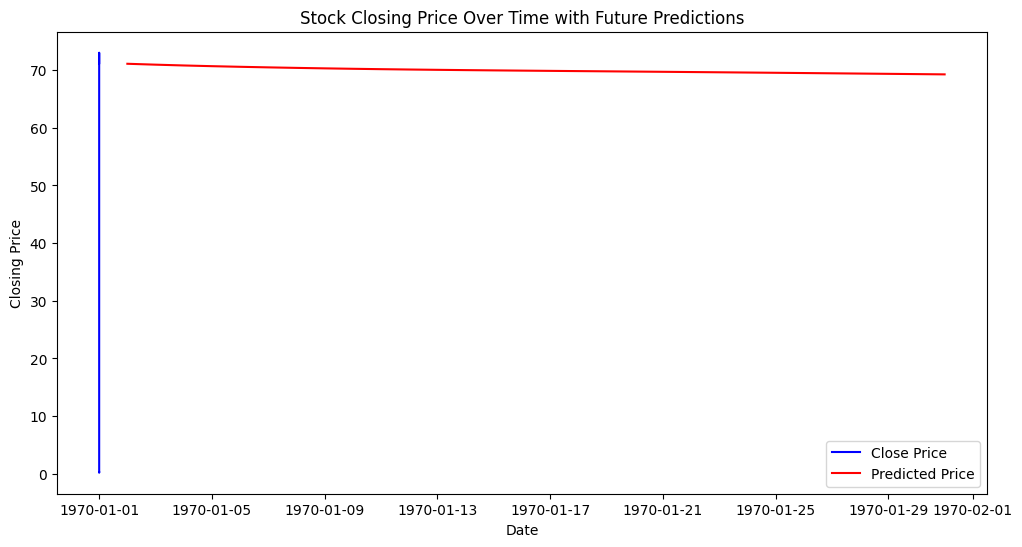

In [88]:
# Visualize Future Stock Price Predictions
plt.figure(figsize=(12, 6))

# Plot historical closing prices in blue
plt.plot(df_merged["date"], df_merged["close"], label="Close Price", color="blue")

# Plot future predicted prices in red
plt.plot(future_dates, predicted_prices, label="Predicted Price", color="red")

plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Stock Closing Price Over Time with Future Predictions")
plt.legend()
plt.show()